In [243]:
import statsmodels.api as sm
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Roboto']


col = ['#5052c7', '#1c84b3', '#0fb390', '#f09816', '#fb3856', '#41429f', '#166a8f', '#0b9072', '#c07a12', '#c92d45']

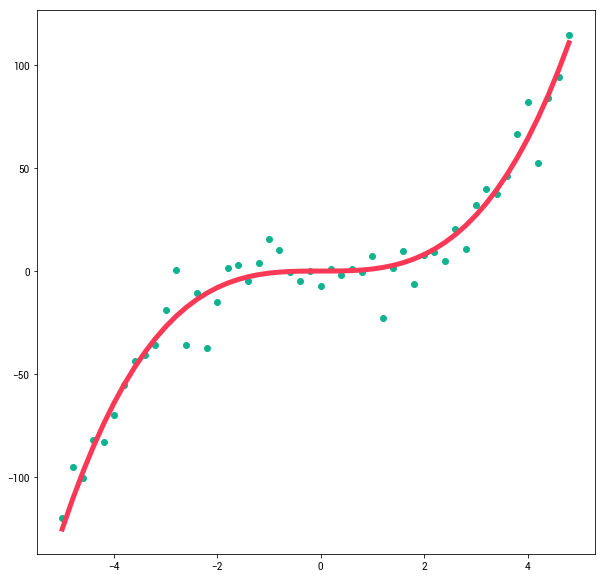

In [454]:
#Generating plots for LR examples section 1
import pylab
x = np.arange(-5,5, 0.2)
y = [i**3 + np.random.normal()*10 for i in x]
plt.figure(figsize = (10,10))
plt.scatter(x = x, y = y, color = col[2])
pylab.plot(x, x**3 , color = col[4], lw = 5)
#plt.ylim([-1, 5])
plt.show()

#### Load the country GDP and Education spend dataset

In [478]:
gdp_df  = pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/economic-indicator/gdp.csv', header = 2)
gov_exp_df = pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/economic-indicator/gov_exp.csv', header = 2)

#### Only get 2013 data, merge the data in one data frame. Drop all countries that have missing data

In [585]:
merged_df = gov_exp_df[['Country Name', '2013']].merge(gdp_df[['Country Name', '2013']], on = 'Country Name').dropna() #get only 2013, merge and drop
merged_df = merged_df.set_index('Country Name')#Set dataframe index to countries
merged_df.columns = ['Spending on Education(%)', 'GDP Growth (%)'] #Set proper column titles
merged_df = merged_df.drop(['Timor-Leste','South Sudan', 'Sierra Leone'],axis = 0)

merged_df.head()

,Spending on Education(%),GDP Growth (%)
Country Name,,
Afghanistan,14.10280,3.900575
Albania,12.12391,1.000755
Andorra,8.04025,0.351645
Argentina,14.45833,2.405324
Armenia,11.13676,3.300000


#### Get Distribution of Education Spend %

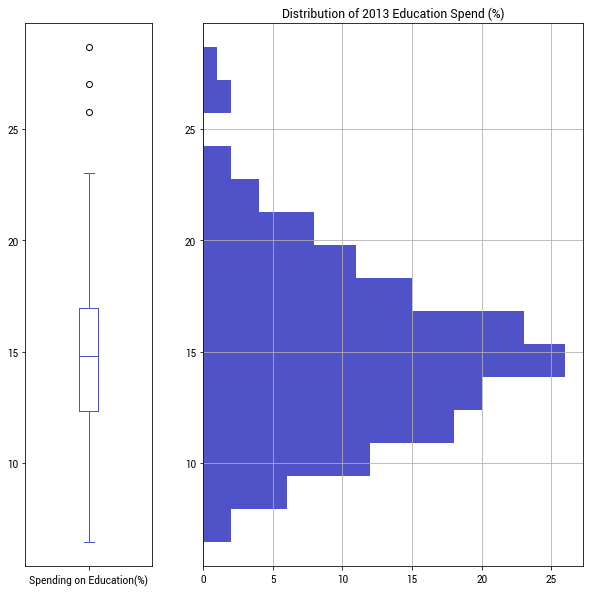

In [555]:
f, ax = plt.subplots(1, 2, figsize = (10,10), gridspec_kw = {'width_ratios':[1, 3]}) #Create subplots to allow multiple plots in one
merged_df.iloc[:, 0].hist(color = col[0], ax = ax[1], orientation='horizontal', bins = 15) #plot histogram
merged_df.iloc[:, 0].plot(kind = 'box', ax = ax[0], color = col[0]) #plot boxplot
plt.title('Distribution of 2013 Education Spend (%)') #set title
plt.show()

#### Get Distribution of GDP Growth (%)

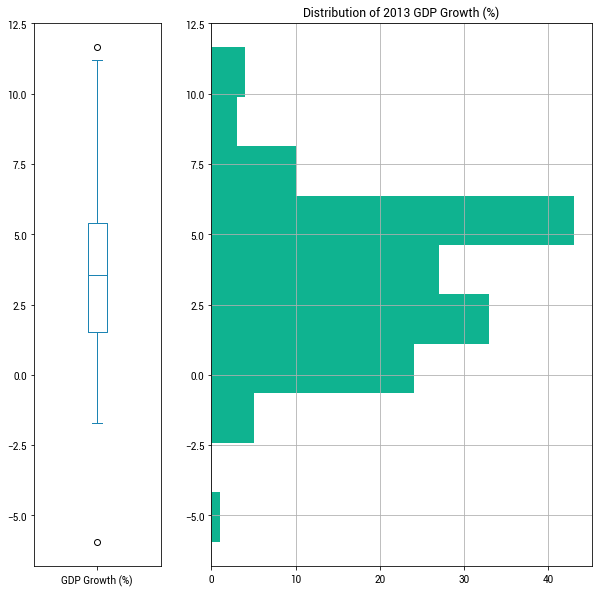

In [556]:
f, ax = plt.subplots(1, 2, figsize = (10,10), gridspec_kw = {'width_ratios':[1, 3]}) #Create subplots to allow multiple plots in one
merged_df.iloc[:, 1].hist(color = col[2], ax = ax[1], orientation='horizontal', bins = 10)  #plot histogram
merged_df.iloc[:, 1].plot(kind = 'box', ax = ax[0], color = col[1]) #plot boxplot
plt.title('Distribution of 2013 GDP Growth (%)') #set title
plt.show()

#### Plot scatter plot of GDP and Education Spend

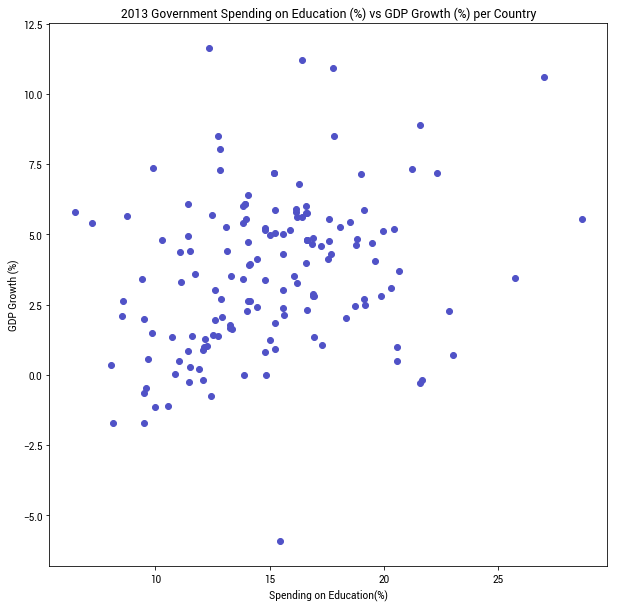

In [557]:
plt.figure(figsize = (10,10))
plt.scatter(x = merged_df['Spending on Education(%)'], y = merged_df['GDP Growth (%)'], color = col[0])
plt.xlabel(merged_df.columns[0])
plt.ylabel(merged_df.columns[1])
plt.title('2013 Government Spending on Education (%) vs GDP Growth (%) per Country')
plt.show()

In [558]:
merged_df.corr() #Get correlation

,Spending on Education(%),GDP Growth (%)
Spending on Education(%),1.000000,0.273628
GDP Growth (%),0.273628,1.000000


#### Fit our Ordinary Least Squares (OLS) Regression Model with our data
Note that we transform our X to allow for a constant variable

In [559]:
model = sm.OLS(merged_df['GDP Growth (%)'], sm.add_constant(merged_df['Spending on Education(%)'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         GDP Growth (%)   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     11.98
Date:                Wed, 22 Aug 2018   Prob (F-statistic):           0.000704
Time:                        01:34:46   Log-Likelihood:                -358.90
No. Observations:                 150   AIC:                             721.8
Df Residuals:                     148   BIC:                             727.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.6823      0.868      0.786      0.433      -1.033       2.398
Spending on Education(%)     0.1936      0.056      3.461      0.001       0.083       0.304
==============================================================================
Omnibus:                        4.611   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                5.686
Skew:                           0.136   Prob(JB):                       0.0582
Kurtosis:                       3.914   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Plot the resulting fitted line with our actual data

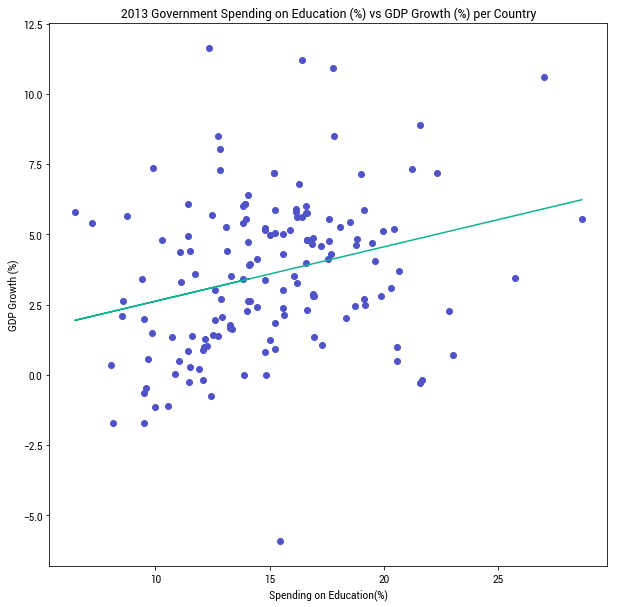

In [560]:
const = model.params['const']
beta = model.params['Spending on Education(%)']
plt.figure(figsize = (10,10))
plt.scatter(x = merged_df['Spending on Education(%)'], y = merged_df['GDP Growth (%)'], color = col[0])
plt.xlabel(merged_df.columns[0])
plt.ylabel(merged_df.columns[1])
plt.title('2013 Government Spending on Education (%) vs GDP Growth (%) per Country')
pylab.plot(merged_df['Spending on Education(%)'], const + beta*merged_df['Spending on Education(%)'], color = col[2])
plt.show()


#### Compare result with standardized values

In [561]:
meansd = {'mean': merged_df.mean(), 'sd':  merged_df.std()}

std_merge = merged_df.copy()
std_merge['Spending on Education(%)'] = (merged_df['Spending on Education(%)'] - meansd['mean']['Spending on Education(%)'])/meansd['sd']['Spending on Education(%)']
std_merge['GDP Growth (%)'] = (merged_df['GDP Growth (%)'] - meansd['mean']['GDP Growth (%)'])/meansd['sd']['GDP Growth (%)']

model2 = sm.OLS(std_merge['GDP Growth (%)'], sm.add_constant(std_merge['Spending on Education(%)'])).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         GDP Growth (%)   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     11.98
Date:                Wed, 22 Aug 2018   Prob (F-statistic):           0.000704
Time:                        01:34:47   Log-Likelihood:                -206.50
No. Observations:                 150   AIC:                             417.0
Df Residuals:                     148   BIC:                             423.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.353e-16      0.079  -1.72e-15      1.000      -0.156       0.156
Spending on Education(%)     0.2736      0.079      3.461      0.001       0.117       0.430
==============================================================================
Omnibus:                        4.611   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                5.686
Skew:                           0.136   Prob(JB):                       0.0582
Kurtosis:                       3.914   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking Model Assumptions

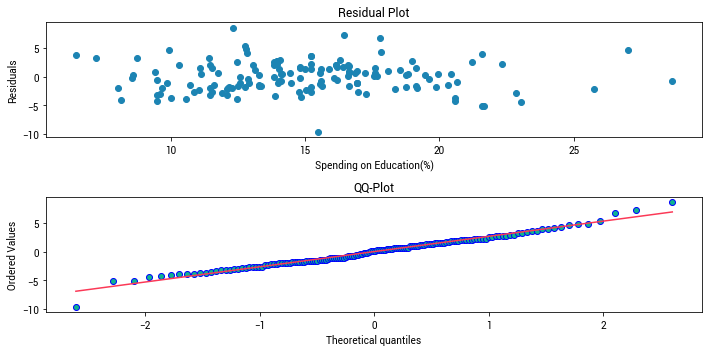

In [562]:
fig, ax = plt.subplots(2, 1, figsize = (10, 5))
residuals = merged_df['GDP Growth (%)'].values - model.predict() #Calculate residuals

# Make residual plot
ax[0].scatter(x = merged_df['Spending on Education(%)'], y= residuals , color = col[1])
ax[0].set_title('Residual Plot')
ax[0].set_xlabel('Spending on Education(%)')
ax[0].set_ylabel('Residuals')

#Make QQ Plot
stats.probplot(residuals, dist="norm", plot= ax[1])
ax[1].get_lines()[0].set_markerfacecolor(col[2])
ax[1].get_lines()[1].set_color(col[4])
ax[1].set_title('QQ-Plot')
plt.tight_layout()
plt.show()

#### Add government expense variable

In [563]:
govexp_df = pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/economic-indicator/expense.csv', header = 2)

In [564]:
merge3_df = govexp_df[['Country Name', '2013']].set_index('Country Name')
merge3_df.columns = ['Government Expense (% GDP)']
merge4_df = merge3_df.merge(merged_df, left_index = True, right_index = True).dropna()

model4 = sm.OLS(merge4_df['GDP Growth (%)'], sm.add_constant(merge4_df.drop('GDP Growth (%)', axis = 1))).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         GDP Growth (%)   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     36.39
Date:                Wed, 22 Aug 2018   Prob (F-statistic):           8.80e-13
Time:                        01:34:47   Log-Likelihood:                -244.59
No. Observations:                 110   AIC:                             495.2
Df Residuals:                     107   BIC:                             503.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          6.2214      1.264      4.922      0.000       3.716       8.727
Government Expense (% GDP)    -0.1609      0.022     -7.264      0.000      -0.205      -0.117
Spending on Education(%)       0.0855      0.061      1.399      0.165      -0.036       0.207
==============================================================================
Omnibus:                       13.667   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.675
Skew:                           0.520   Prob(JB):                     7.23e-06
Kurtosis:                       5.021   Cond. No.                         183.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""